**Decision Tree**

Chúng ta có một tệp dữ liệu của 20 bệnh nhân. Dữ liệu bao gồm thông tin của bệnh nhân, nồng độ cholesterol, Na, Kali và dựa trên đó là loại thuốc A, B, C, B mà bác sĩ cấp cho bệnh nhân sử dụng:

In [40]:
data = [
{'age': 33, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high',
'Na': 0.66, 'K': 0.06, 'drug': 'A'},
{'age': 77, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal',
'Na': 0.19, 'K': 0.03, 'drug': 'D'},
{'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal',
'Na': 0.80, 'K': 0.05, 'drug': 'B'},
{'age': 39, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal',
'Na': 0.19, 'K': 0.02, 'drug': 'C'},
{'age': 43, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'high',
'Na': 0.36, 'K': 0.03, 'drug': 'D'},
{'age': 82, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal',
'Na': 0.09, 'K': 0.09, 'drug': 'C'},
{'age': 40, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal',
'Na': 0.89, 'K': 0.02, 'drug': 'A'},
{'age': 88, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal',
'Na': 0.80, 'K': 0.05, 'drug': 'B'},
{'age': 29, 'sex': 'F', 'BP': 'high', 'cholesterol': 'normal',
'Na': 0.35, 'K': 0.04, 'drug': 'D'},
{'age': 53, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'normal',
'Na': 0.54, 'K': 0.06, 'drug': 'C'},
{'age': 63, 'sex': 'M', 'BP': 'low', 'cholesterol': 'high',
'Na': 0.86, 'K': 0.09, 'drug': 'B'},
{'age': 60, 'sex': 'M', 'BP': 'low', 'cholesterol': 'normal',
'Na': 0.66, 'K': 0.04, 'drug': 'C'},
{'age': 55, 'sex': 'M', 'BP': 'high', 'cholesterol': 'high',
'Na': 0.82, 'K': 0.04, 'drug': 'B'},
{'age': 35, 'sex': 'F', 'BP': 'normal', 'cholesterol': 'high',
'Na': 0.27, 'K': 0.03, 'drug': 'D'},
{'age': 23, 'sex': 'F', 'BP': 'high', 'cholesterol': 'high',
'Na': 0.55, 'K': 0.08, 'drug': 'A'},
{'age': 49, 'sex': 'F', 'BP': 'low', 'cholesterol': 'normal',
'Na': 0.27, 'K': 0.05, 'drug': 'C'},
{'age': 27, 'sex': 'M', 'BP': 'normal', 'cholesterol': 'normal',
'Na': 0.77, 'K': 0.02, 'drug': 'B'},
{'age': 51, 'sex': 'F', 'BP': 'low', 'cholesterol': 'high',
'Na': 0.20, 'K': 0.02, 'drug': 'D'},
{'age': 38, 'sex': 'M', 'BP': 'high', 'cholesterol': 'normal',
'Na': 0.78, 'K': 0.05, 'drug': 'A'}
]


Chắc chắn sẽ có lí do để bác sĩ kê đơn thuốc A, B, C, D từ những loại thông tin trên. Tuy nhiên nếu không phải người trong ngành thì tìm ra mối quan hệ giữa các loại thông tin này là rất khó. 
Chúng ta sẽ dùng decision tree để thử tìm xem các mối quan hệ này

Đầu tiên, bởi vì nhiệm vụ của chúng ta là khám phá ra mối quan hệ giữa các loại dữ liệu và gán nhãn cho chúng, thế nên mục "drug" sẽ là kết quả cuối cùng của chúng ta. 
Nên trong quá trình phân tích chúng ta sẽ tách chúng ra khỏi tập dữ liệu

In [41]:
target = [d['drug'] for d in data]
print(target)
[d.pop('drug') for d in data];

['A', 'D', 'B', 'C', 'D', 'C', 'A', 'B', 'D', 'C', 'B', 'C', 'B', 'D', 'A', 'C', 'B', 'D', 'A']


Tiếp đến chúng ta sẽ thử vẽ biểu đồ lượng Natri so với Kali 

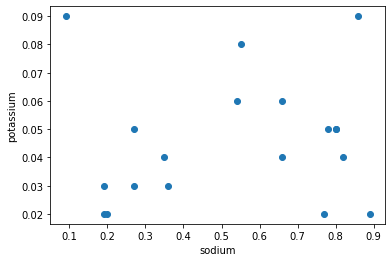

In [42]:
import matplotlib.pyplot as plt

age = [d['age'] for d in data]
sodium = [d['Na'] for d in data]
potassium = [d['K'] for d in data]

plt.scatter(sodium, potassium)
plt.xlabel('sodium')
plt.ylabel('potassium')
plt.show()

Có vẻ biểu đồ trên vẫn chưa chứa quá nhiều thông tin.
Thử kết hợp chúng với loại thuốc đã được kê, phân loại chúng dựa trên màu sắc
(A, B, C, D theo thứ tự 1, 2, 3, 4 kết hợp với hàm scatter để tự động phân loại màu cho nó)

Text(0, 0.5, 'sodium (Na)')

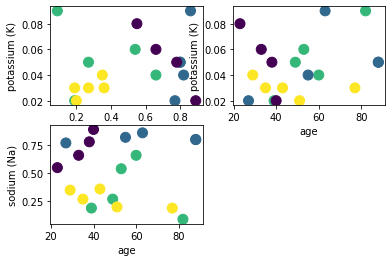

In [43]:
target = [ord(t) - 65 for t in target]
plt.subplot(221)
plt.scatter(sodium, potassium, c=target, s=100)
plt.xlabel('sodium (Na)')
plt.ylabel('potassium (K)')
plt.subplot(222)
plt.scatter(age, potassium, c=target, s=100)
plt.xlabel('age')
plt.ylabel('potassium (K)')
plt.subplot(223)
plt.scatter(age, sodium, c=target, s=100)
plt.xlabel('age')
plt.ylabel('sodium (Na)')


Đoạn code đã vẽ cho chúng ta 3 biểu đồ tương ứng với các cặp dữ liệu (K, Na), (K, age), (Na, age).

Từ biểu đồ chúng ta có thể thấy được một số mối quan hệ dễ dàng hơn.

Ví dụ như ở biểu đồ đầu tiên thì các điểm màu xanh dương tập trung ở chỗ có nồng độ natri cao 

Để sử dụng decision tree thì các dữ liệu cần ở dạng số, nên chúng ta cần chuyển đổi các dữ liệu 'sex', 'BP' 'cholesterol' thành dữ liệu dạng số. 

Sử dụng hàm DicVectorizer của scikit-learn và fit_transform

Để nó phù hợp với OpenCV thì chúng ta sẽ chuyển nó thành kiểu dữ liệu float

In [48]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)

data_pre = vec.fit_transform(data)

data_pre = np.array(data_pre, dtype=np.float32)
target = np.array(target, dtype=np.float32)

print(data_pre[0])


[ 1.    0.    0.    0.06  0.66 33.    1.    0.    1.    0.  ]


Vì có 2 điểm dữ liệu nên chúng ta sẽ chia nó thành 2 tập 15-5 tương ứng với bộ dữ liệu training và bộ dữ liệu kiểm tra:

In [50]:
import sklearn.model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(data_pre, target, test_size=5, random_state=42)

Hiển thị accuracy của decision tree

In [58]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
dtc.score(X_train, y_train)

1.0

In [53]:
dtc.score(X_test, y_test)

0.4